In [35]:
from importlib import reload
import models.utils; reload(models.utils)
from models.utils import *
% matplotlib inline

In [28]:
def plot_results(exp_id):
    try:
        plot_losses(exp_id)
    except FileNotFoundError:
        print('History file does not exist (yet)')
    if 'mnist' in exp_id:
        plot_mnist_progression(exp_id)
    else:
        plot_radar_progression(exp_id)

## MNIST1

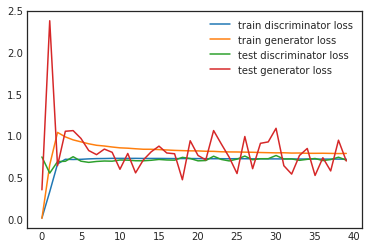

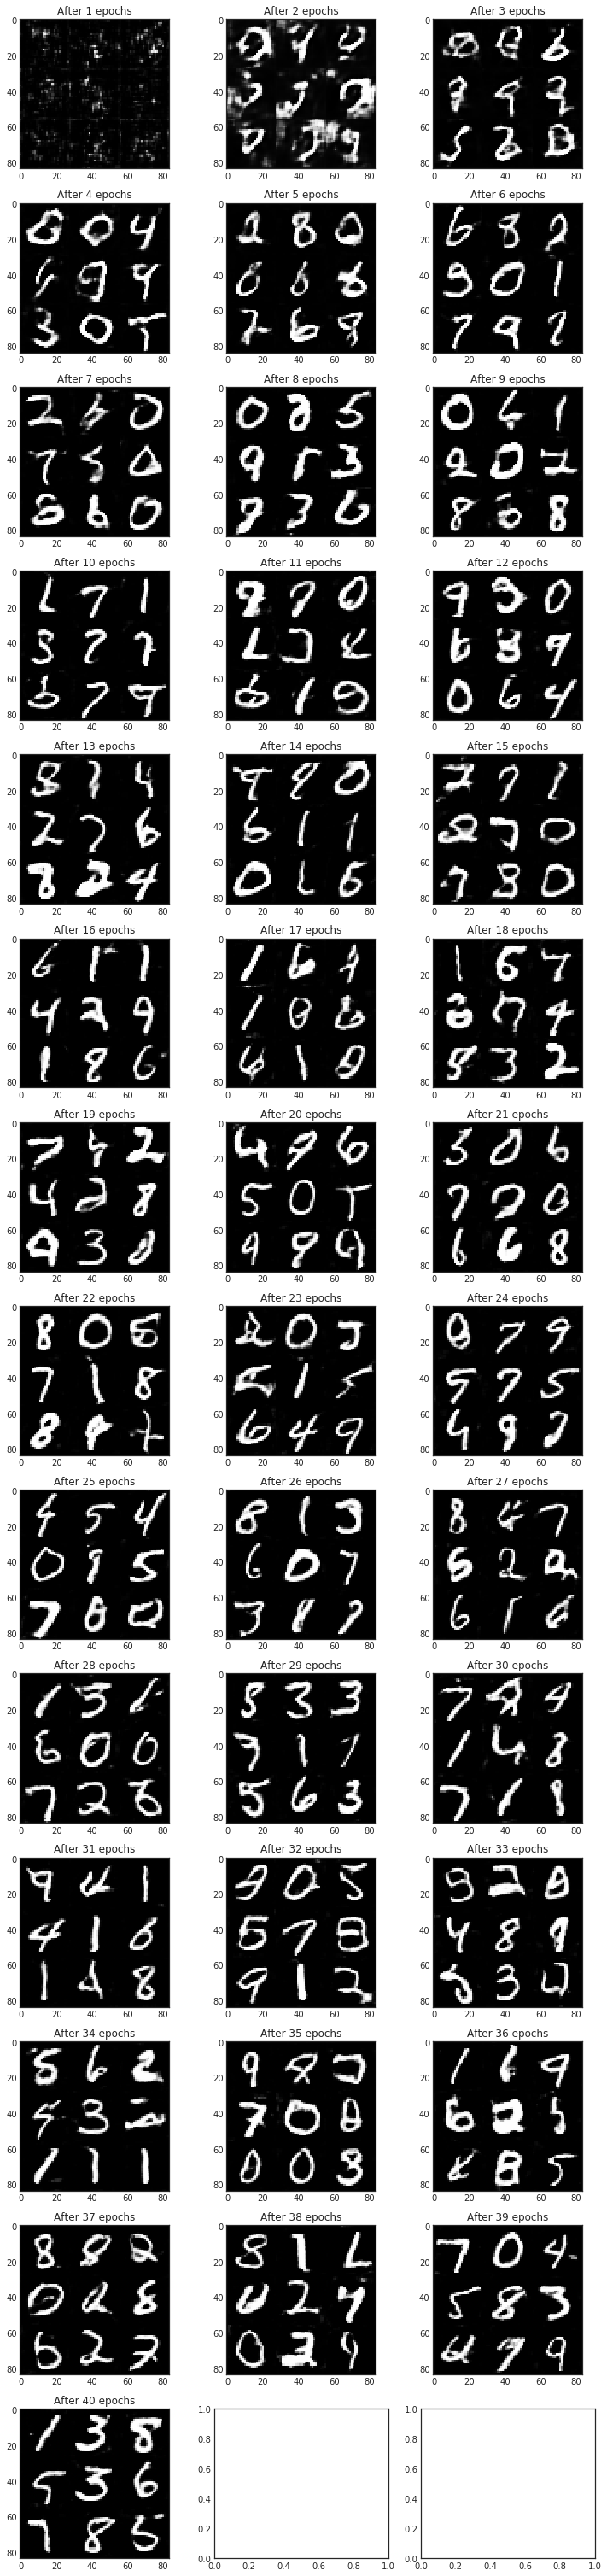

In [40]:
plot_results('mnist1')

## MNIST 2 - Wasserstein

History file does not exist (yet)


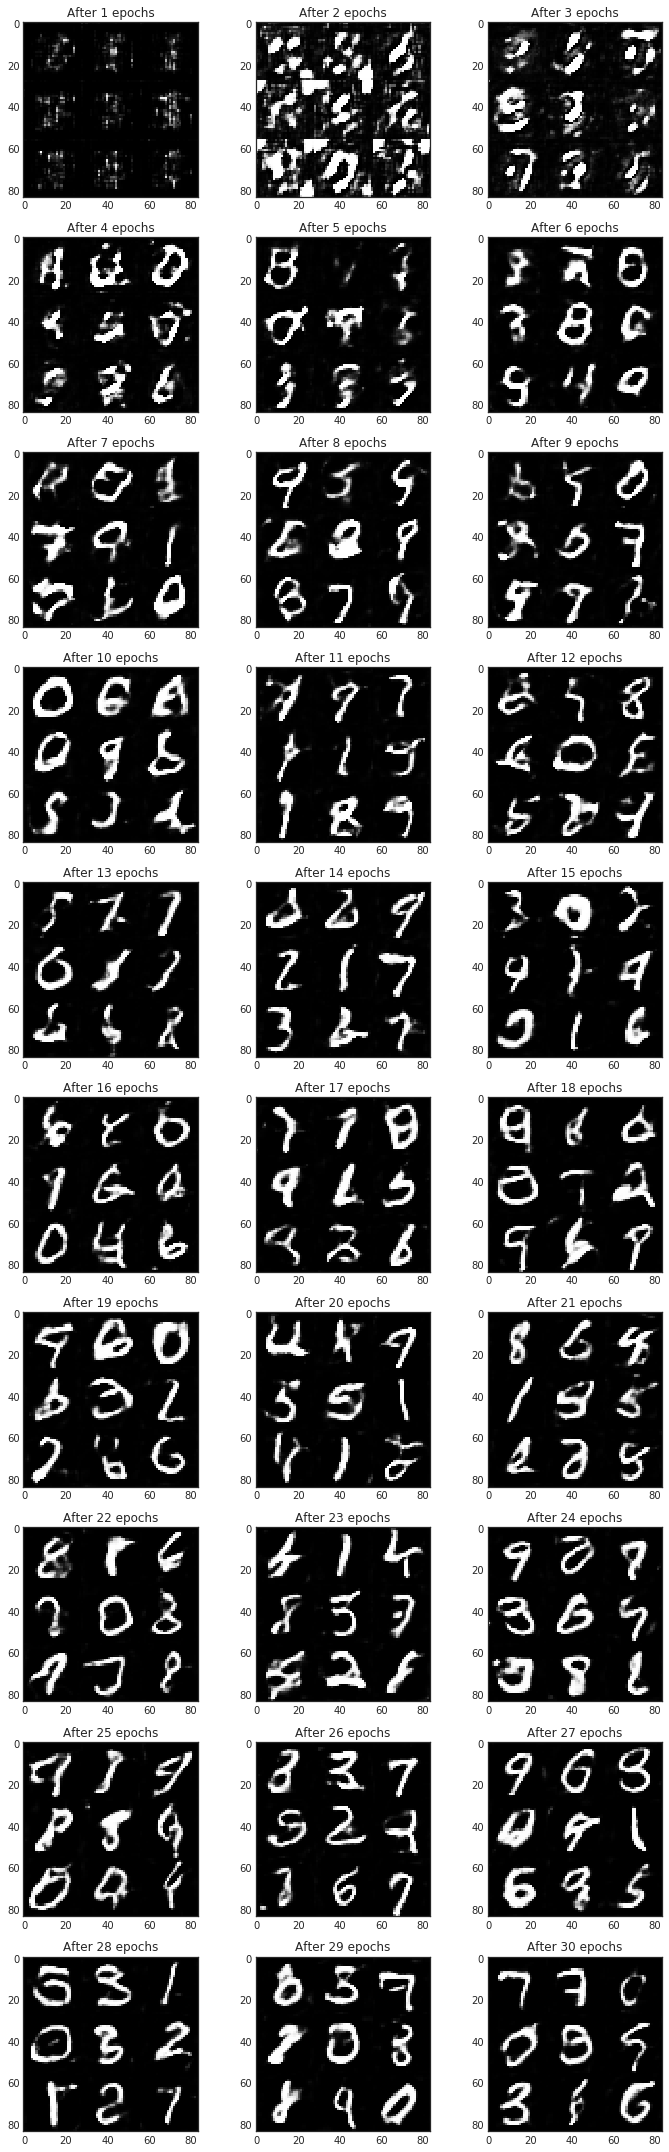

In [41]:
plot_results('mnist2')

## MNIST 3 - More complex

History file does not exist (yet)


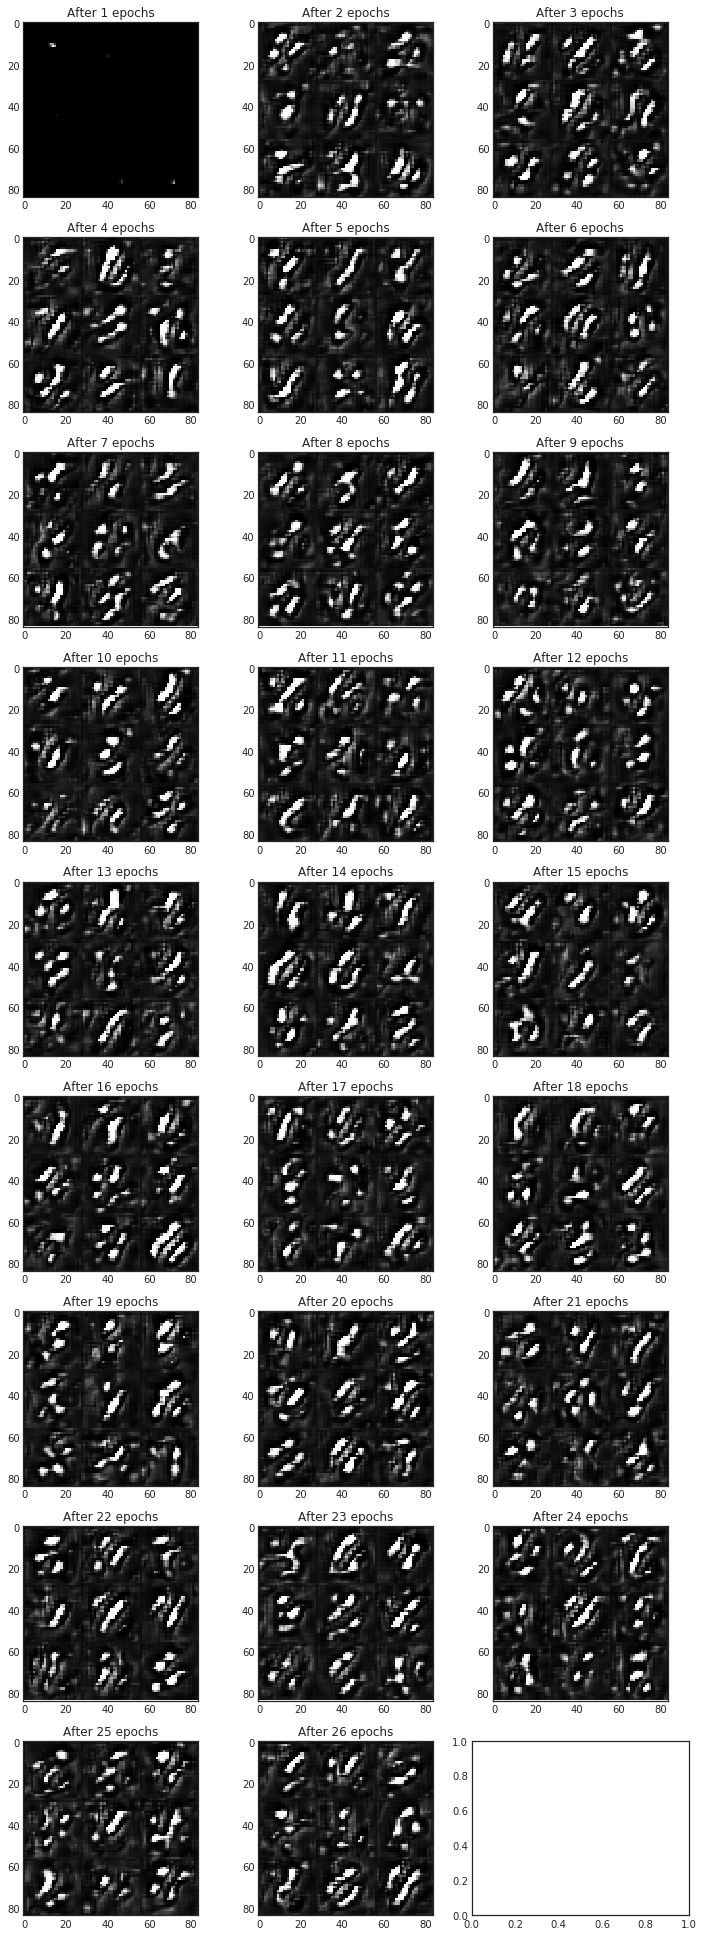

In [42]:
plot_results('mnist3')

## MNIST 4 - Complex Wasserstein

History file does not exist (yet)


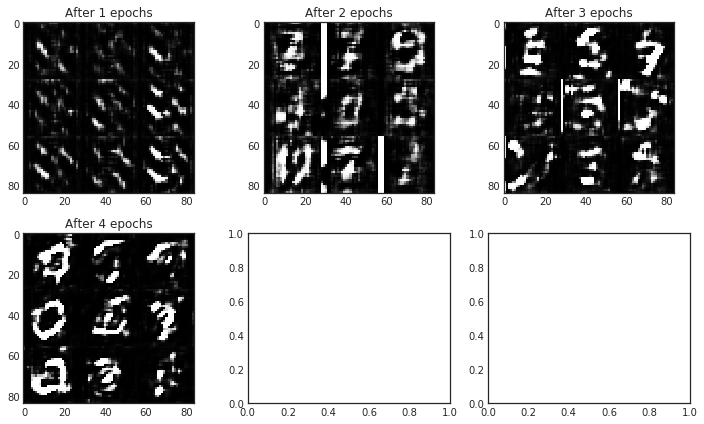

In [43]:
plot_results('mnist4')

## MNIST 5 - Dropout

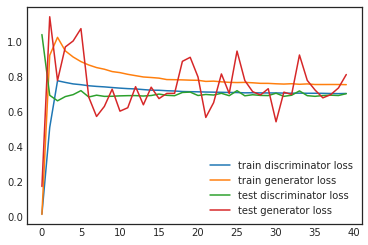

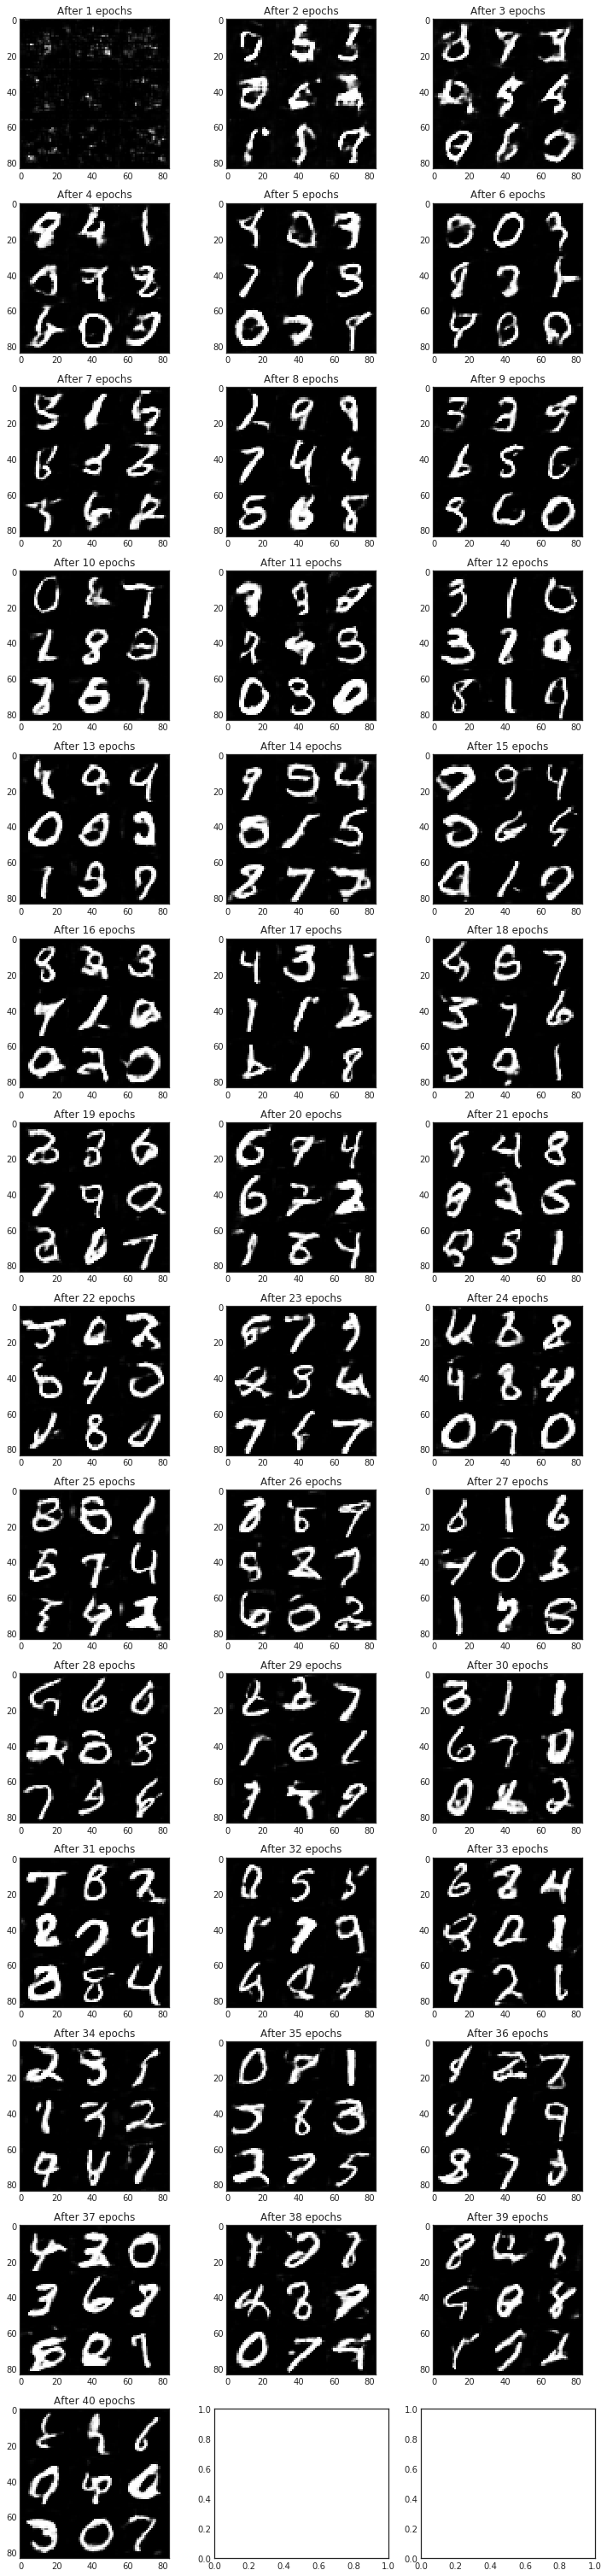

In [44]:
plot_results('mnist5')

## RADAR 1

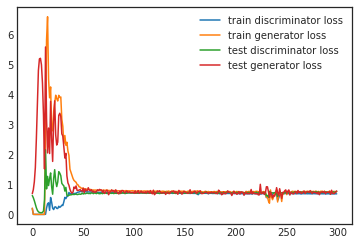

Epoch: 1


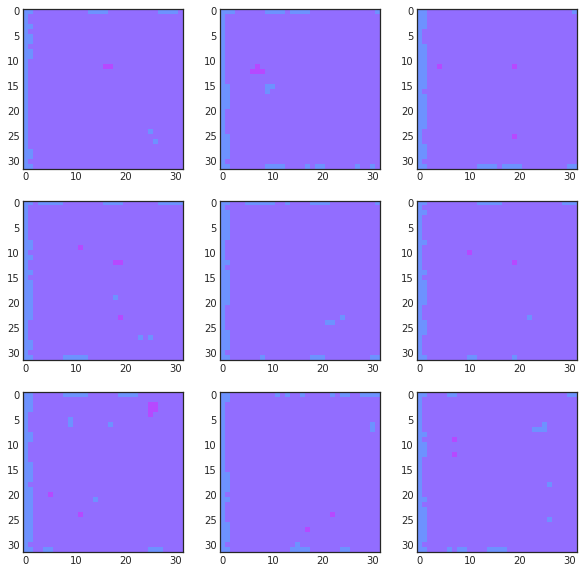

Epoch: 11


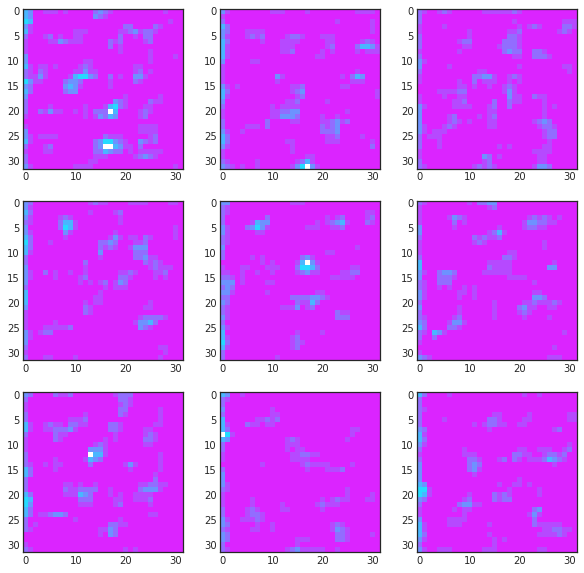

Epoch: 21


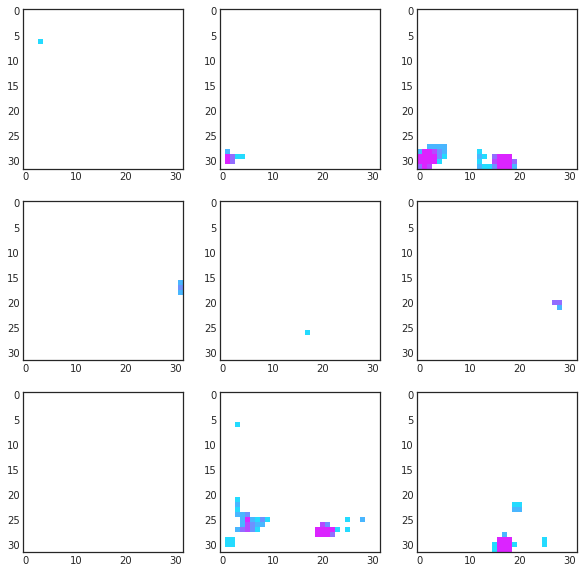

Epoch: 31


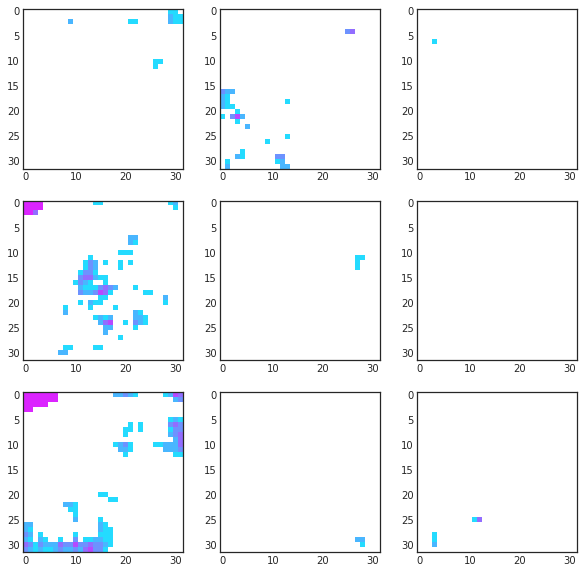

Epoch: 41


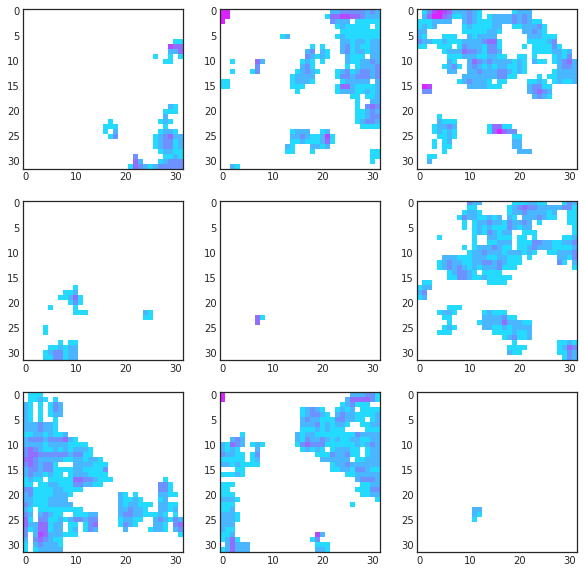

Epoch: 51


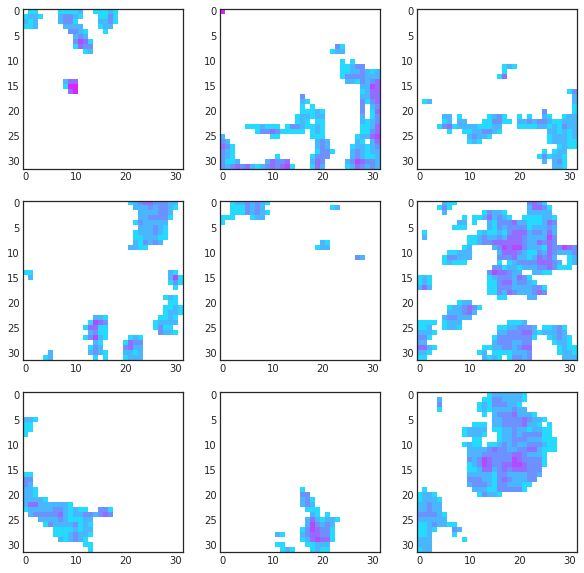

Epoch: 61


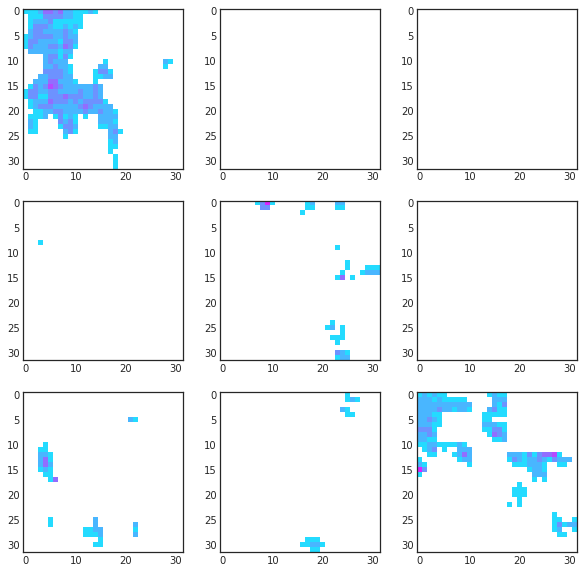

Epoch: 71


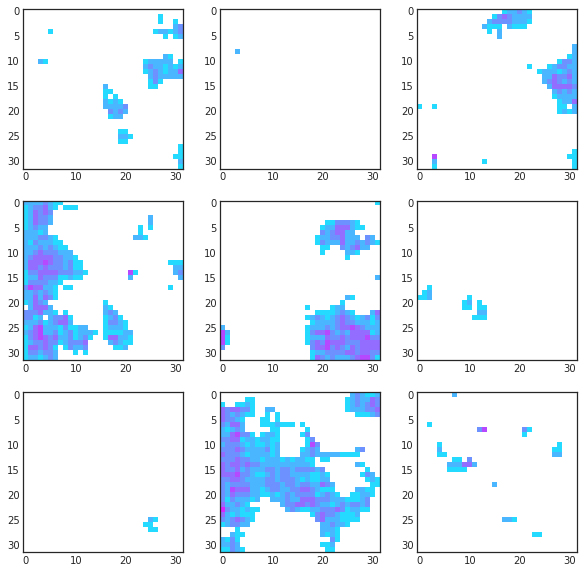

Epoch: 81


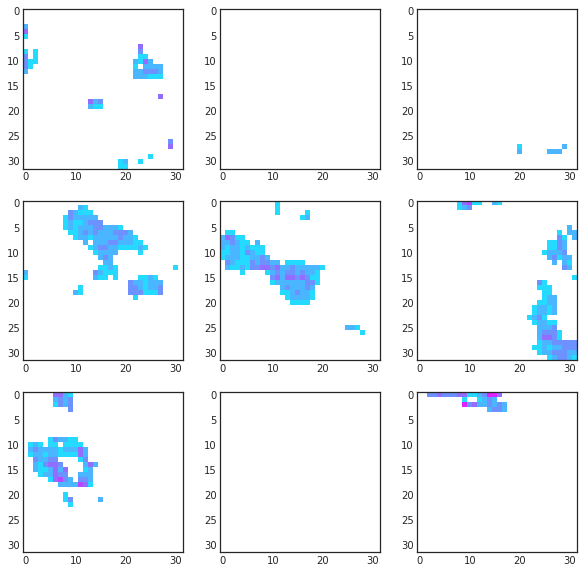

Epoch: 91


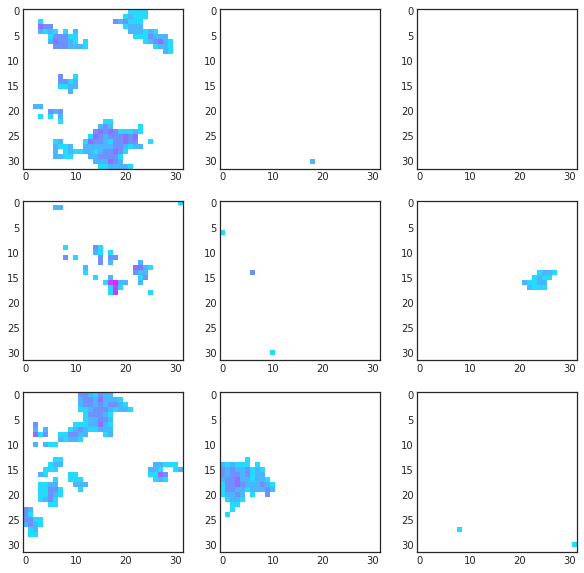

Epoch: 101


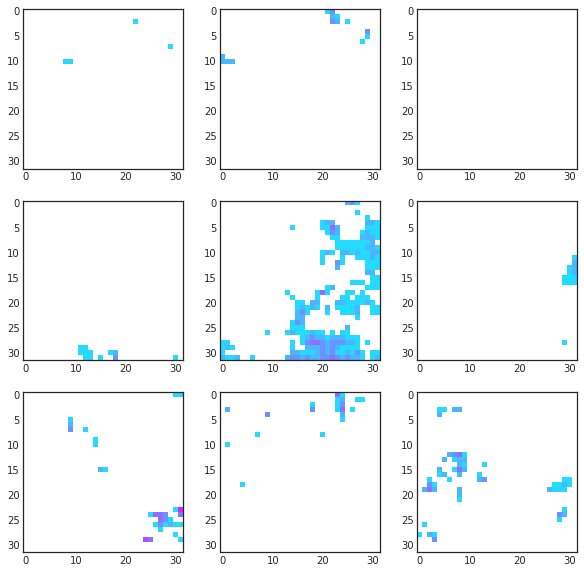

Epoch: 111


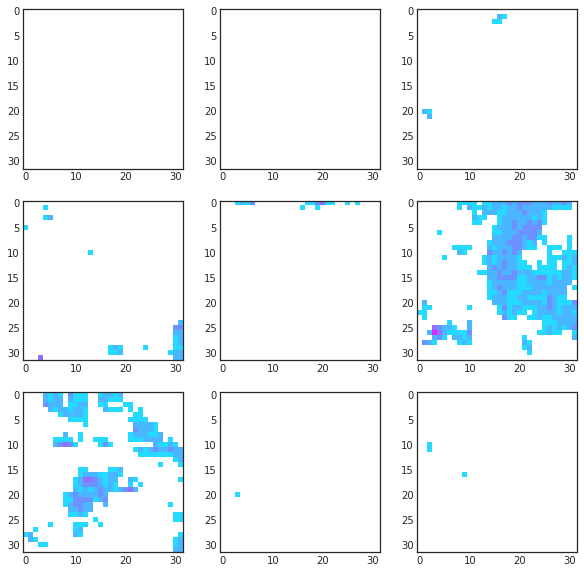

Epoch: 121


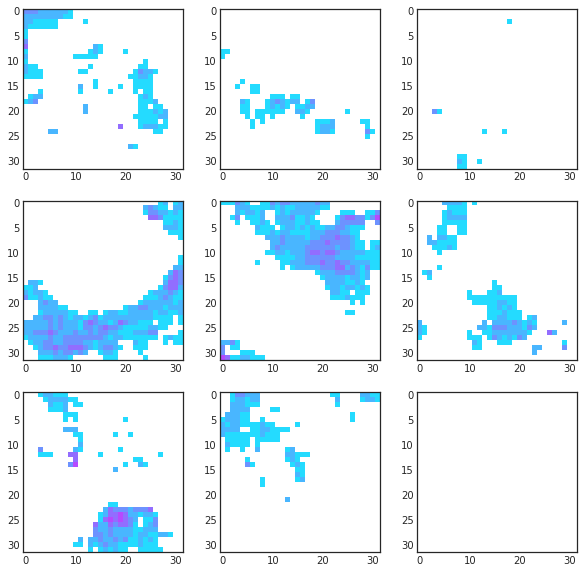

Epoch: 131


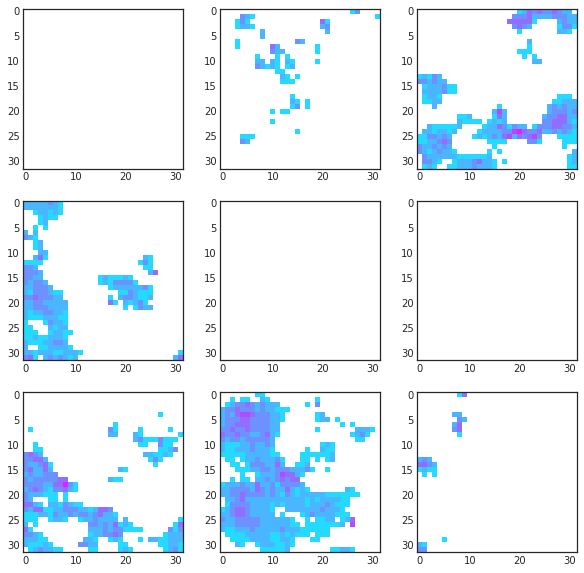

Epoch: 141


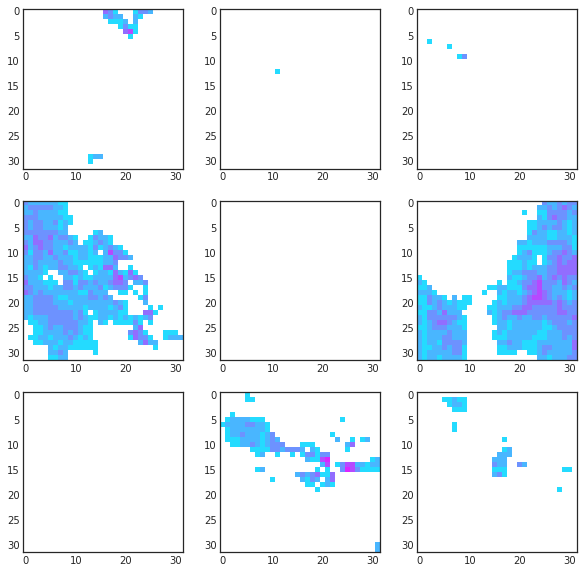

Epoch: 151


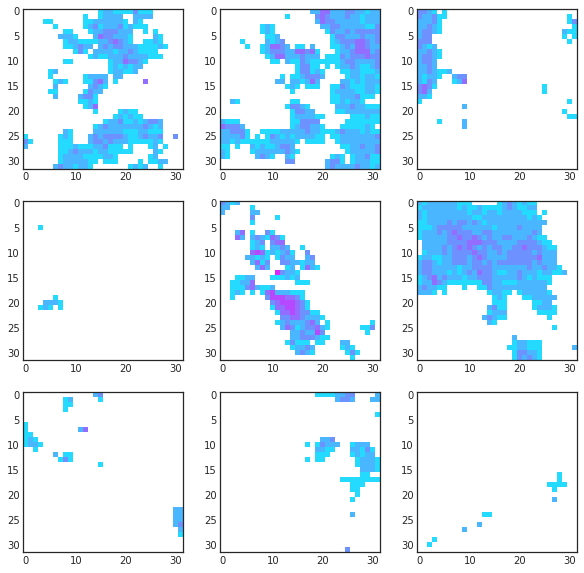

Epoch: 161


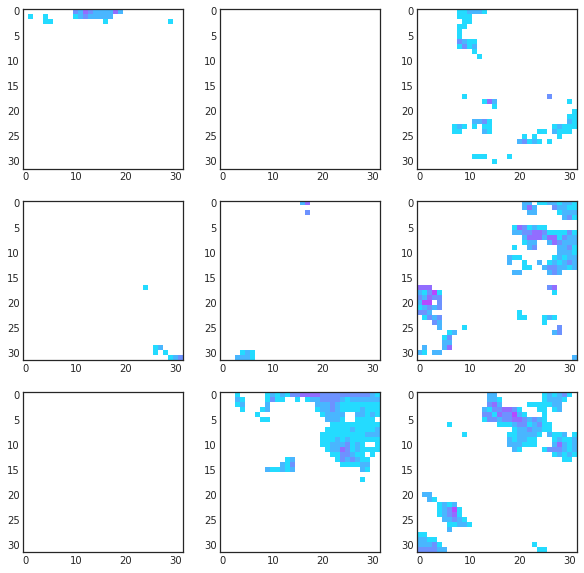

Epoch: 171


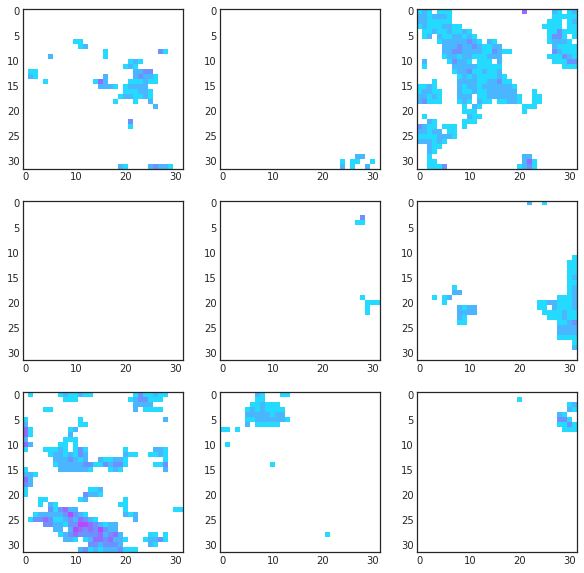

Epoch: 181


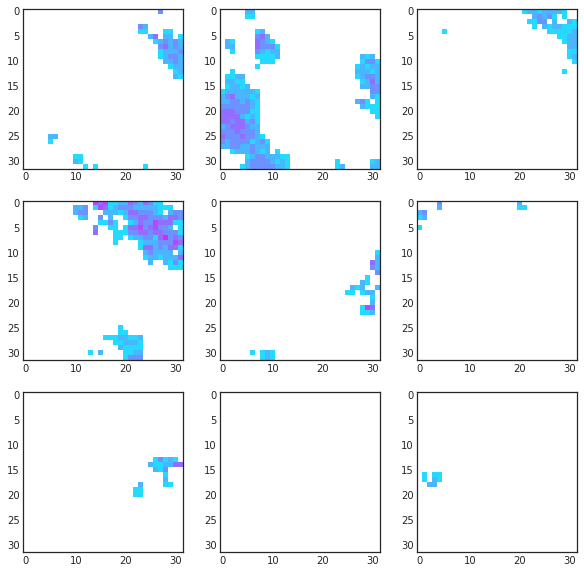

Epoch: 191


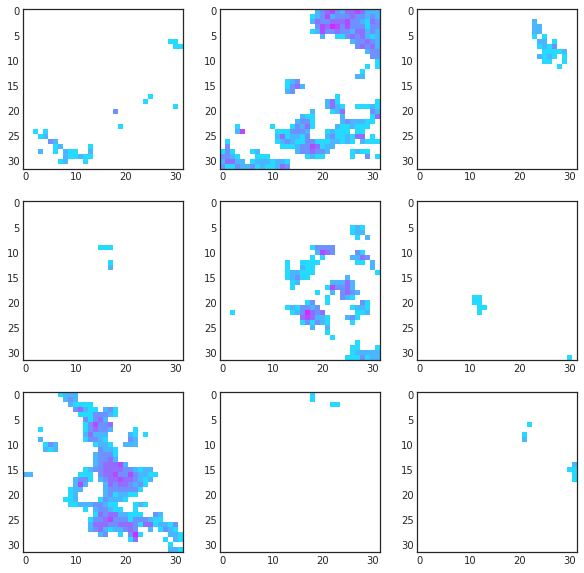

Epoch: 201


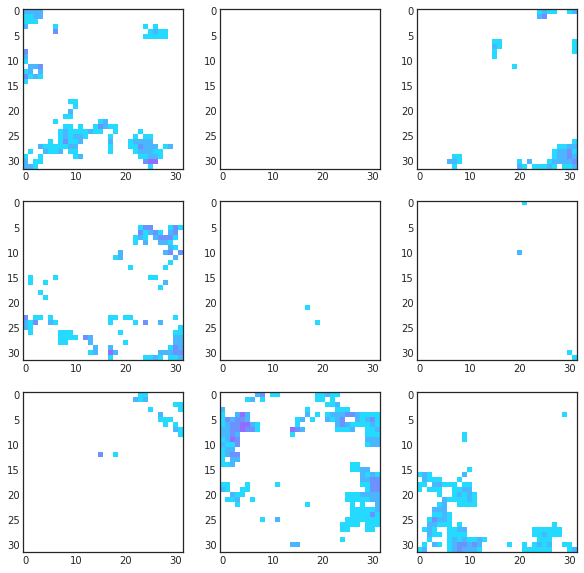

Epoch: 211


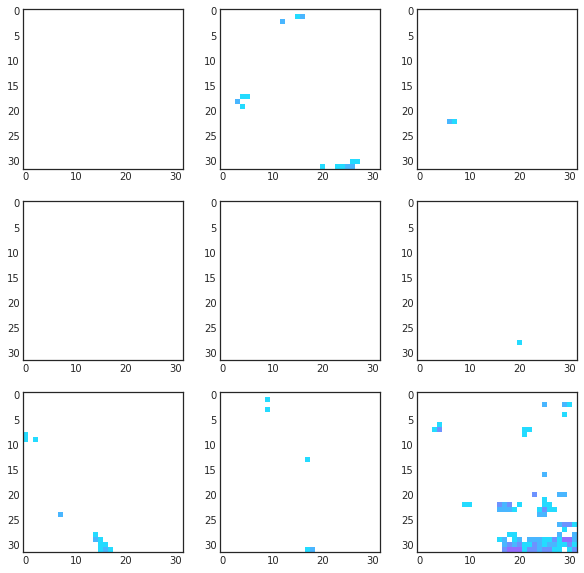

Epoch: 221


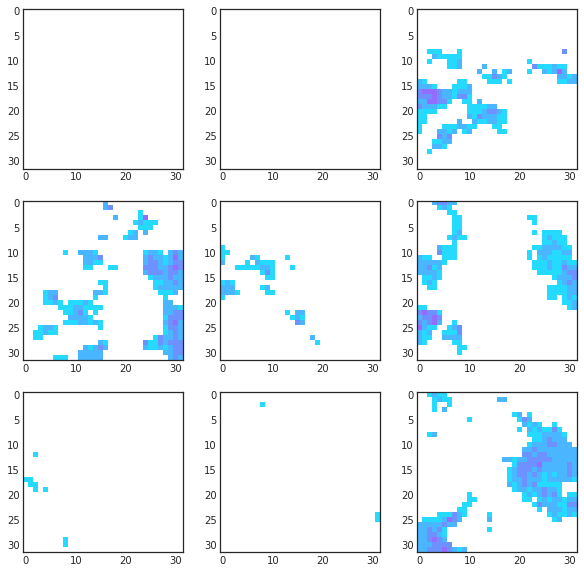

Epoch: 231


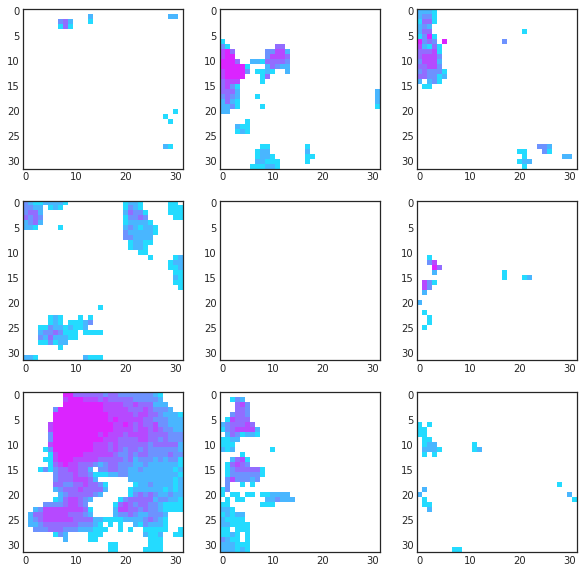

Epoch: 241


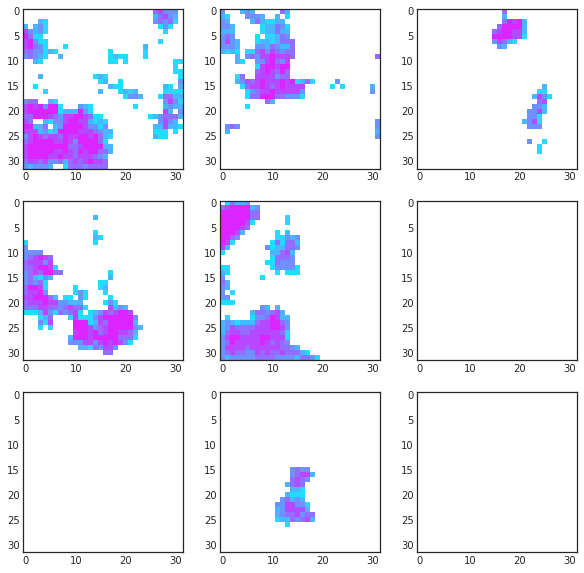

Epoch: 251


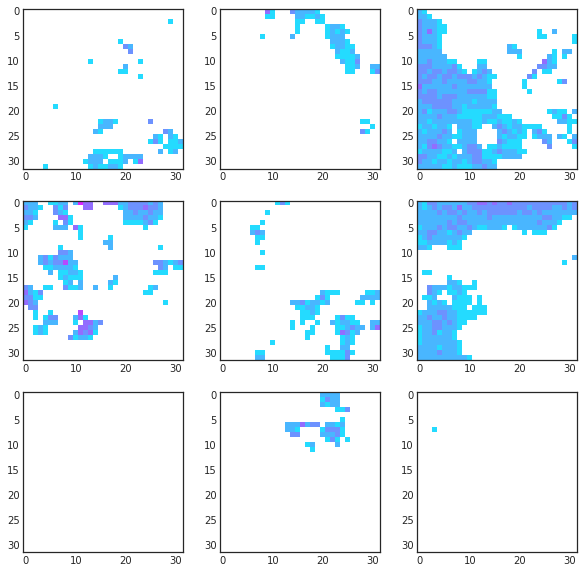

Epoch: 261


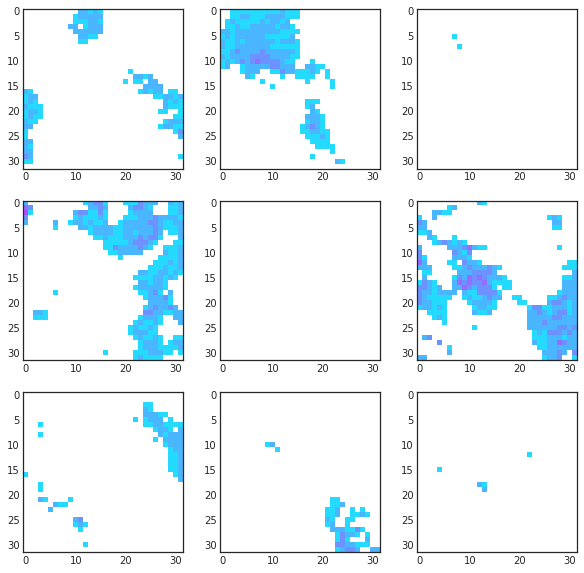

Epoch: 271


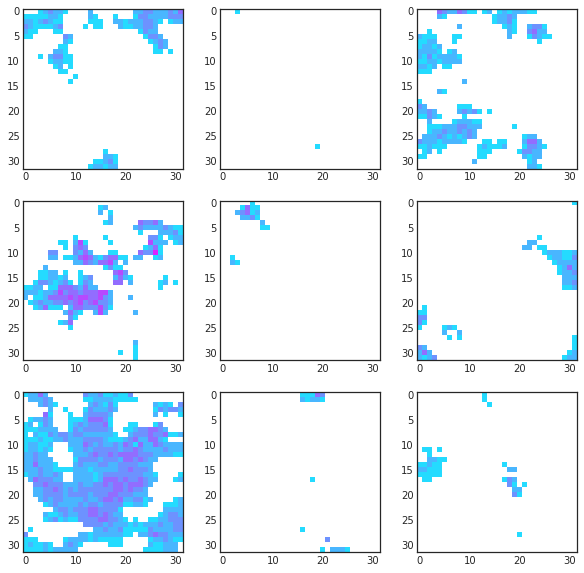

Epoch: 281


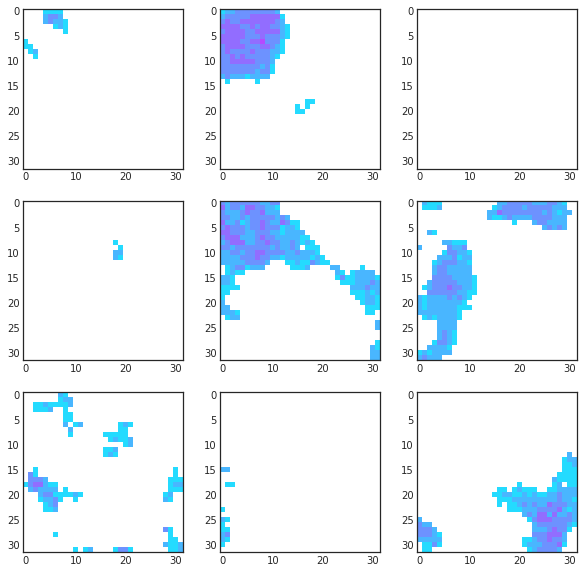

Epoch: 291


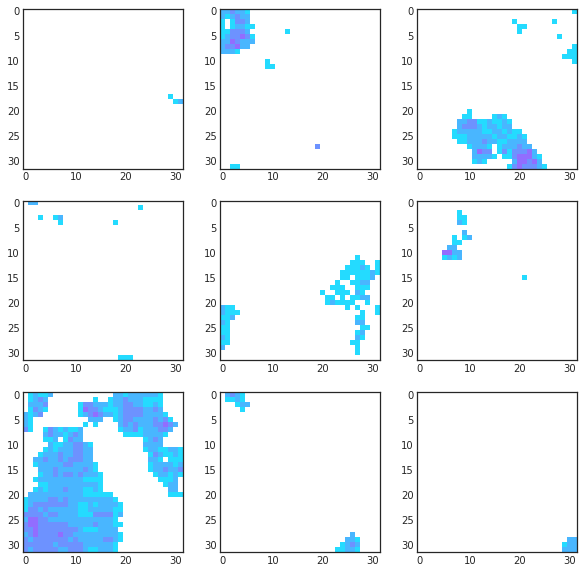

In [45]:
plot_results('radar1')

## RADAR 2 - Wasserstein

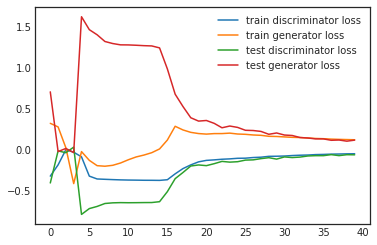

Epoch: 1


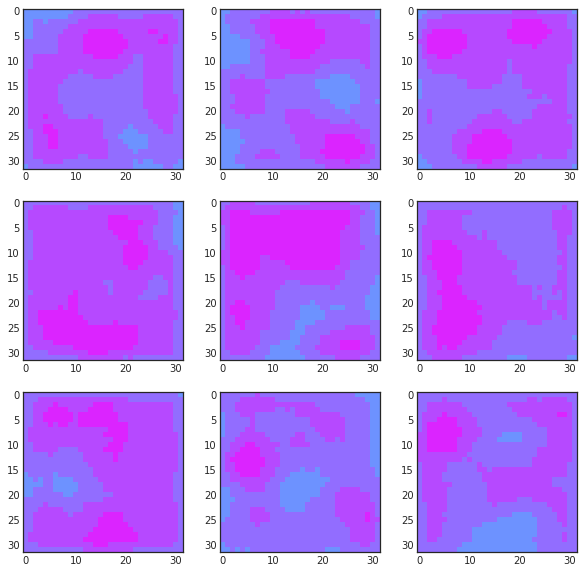

Epoch: 11


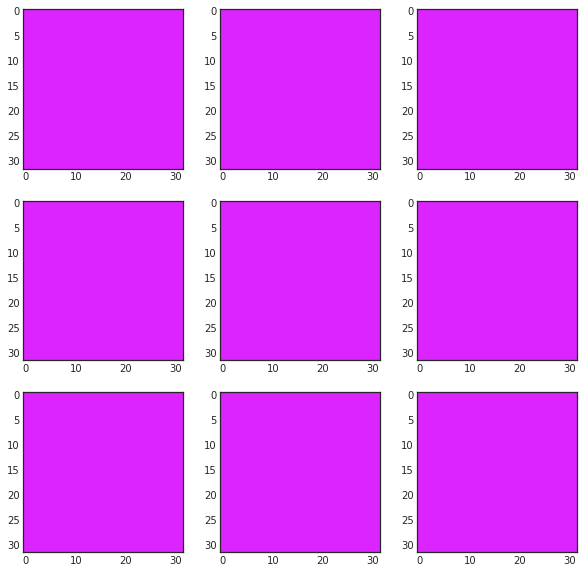

Epoch: 21


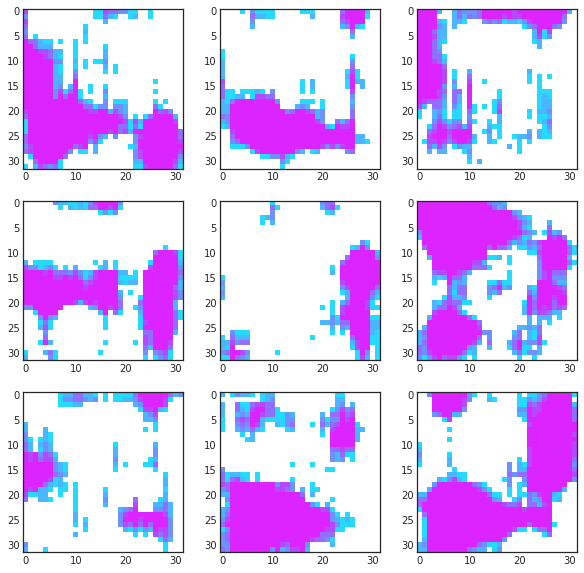

Epoch: 31


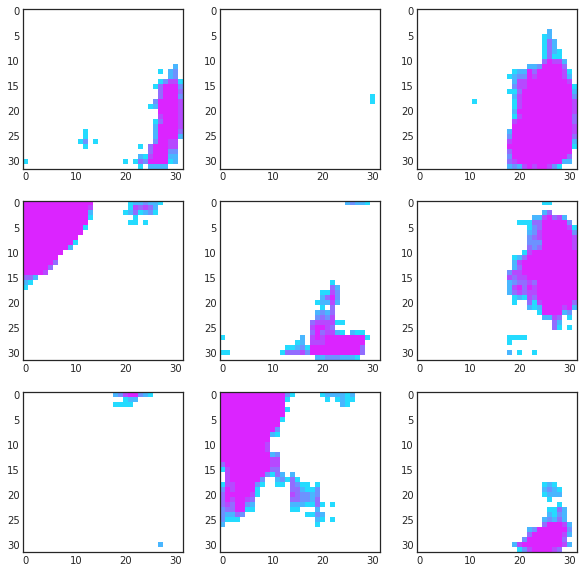

Epoch: 41


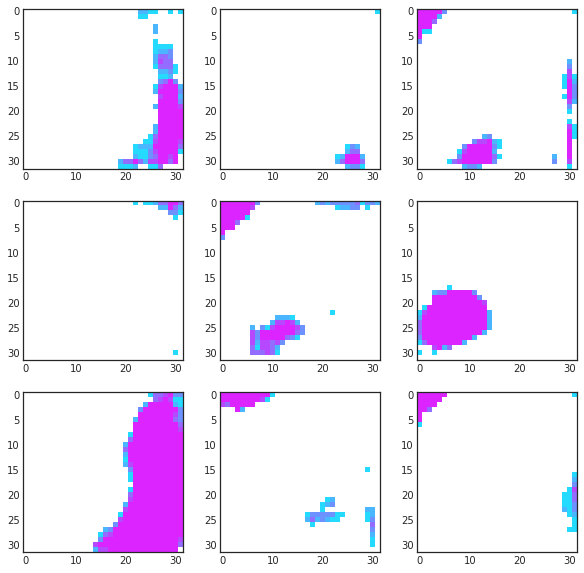

Epoch: 51


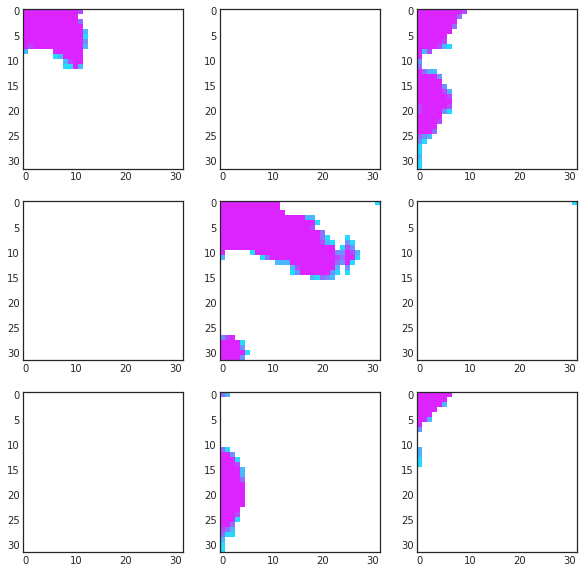

Epoch: 61


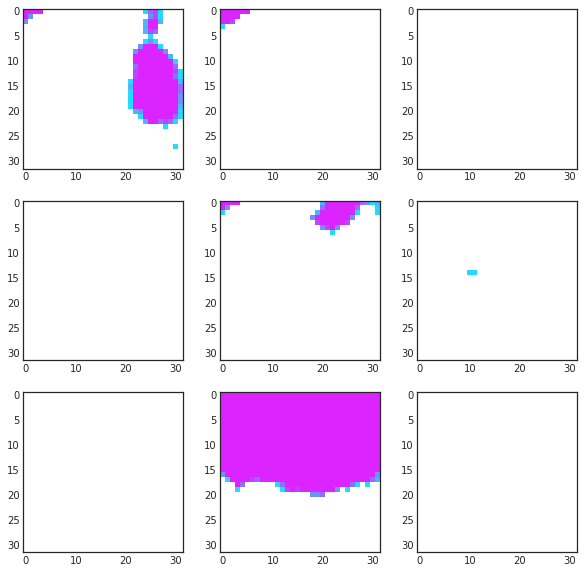

Epoch: 71


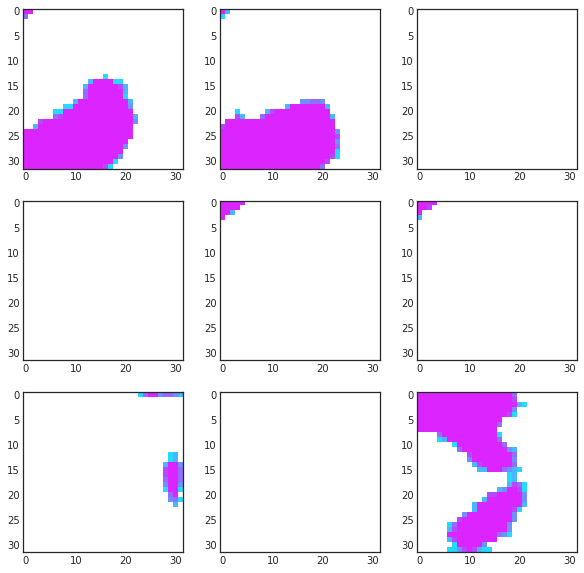

Epoch: 81


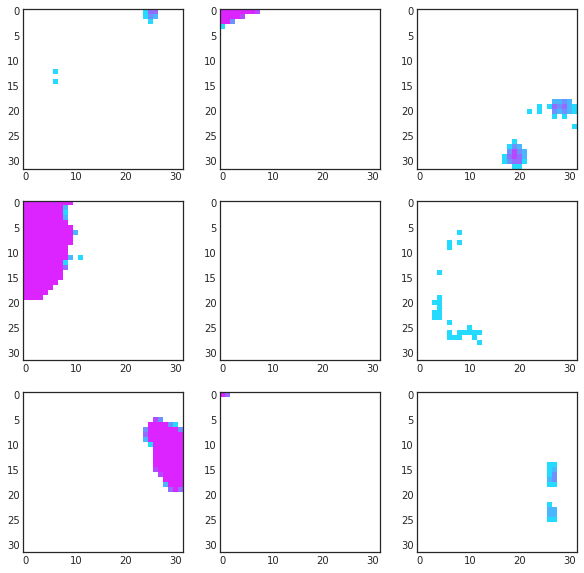

Epoch: 91


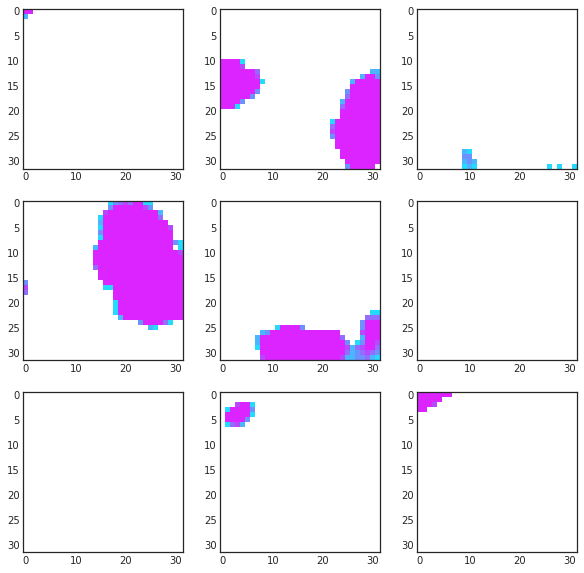

Epoch: 101


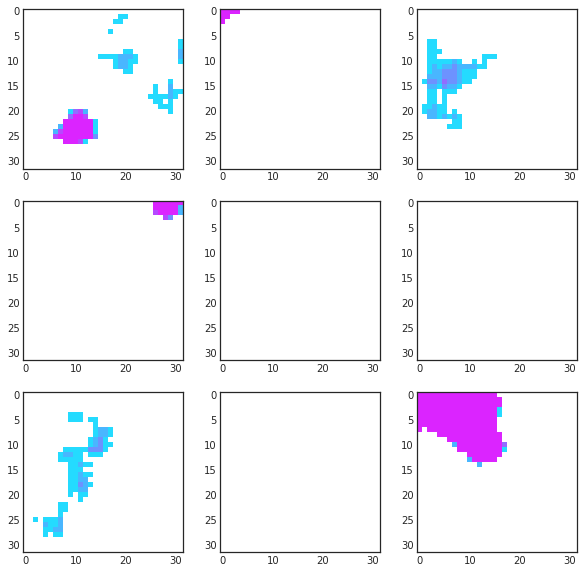

Epoch: 111


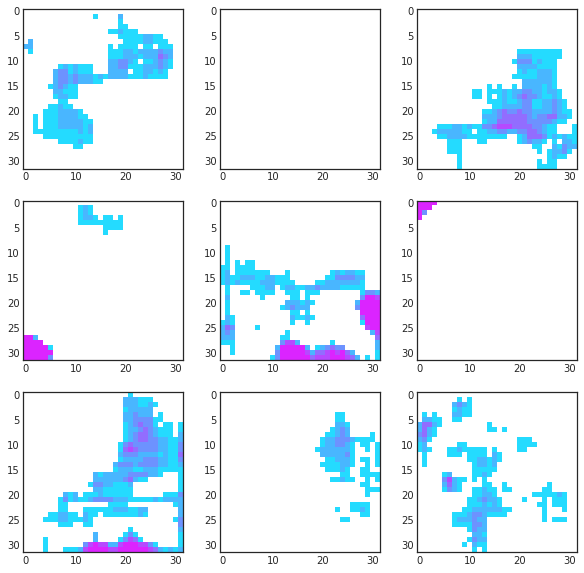

Epoch: 121


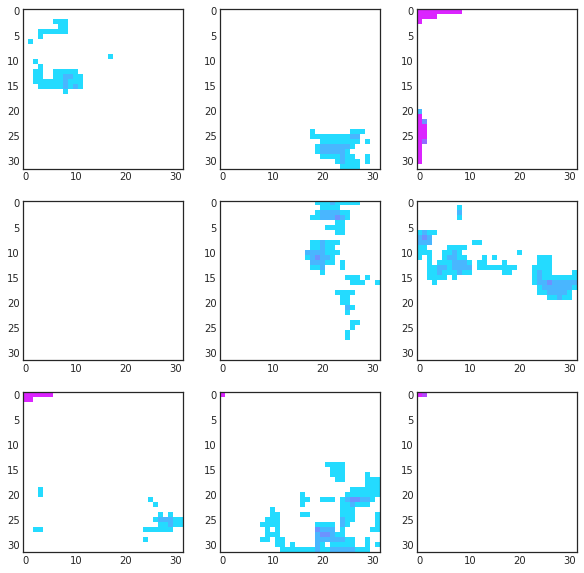

Epoch: 131


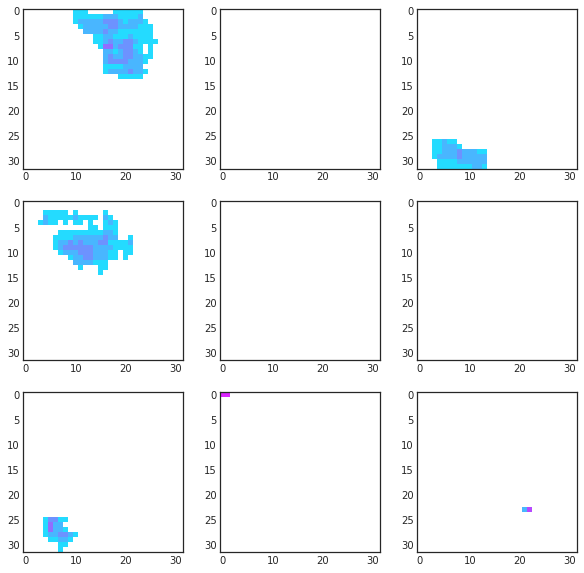

Epoch: 141


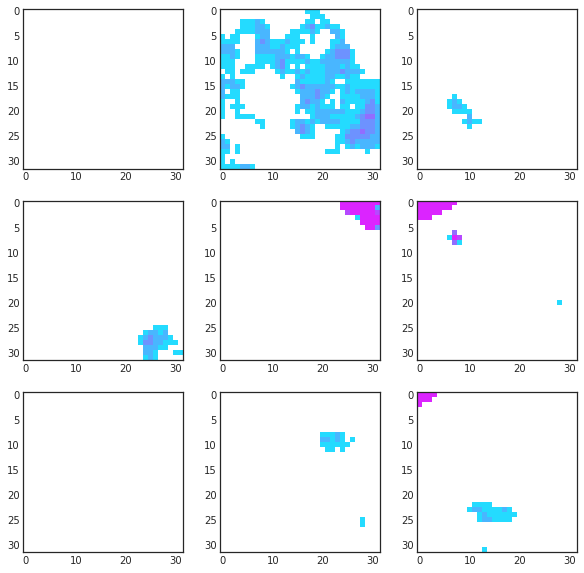

Epoch: 151


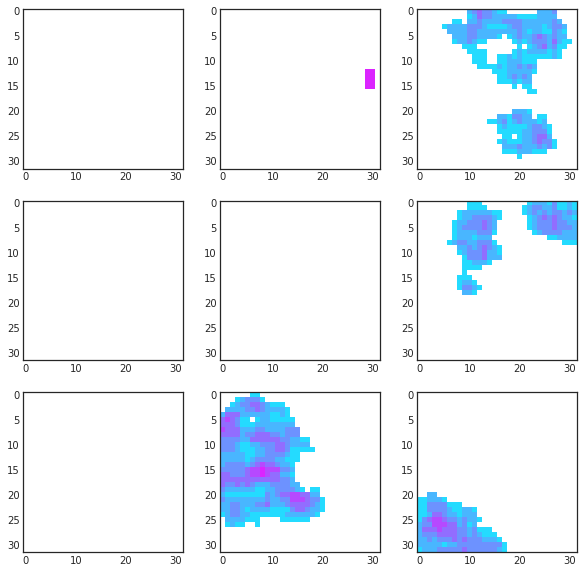

Epoch: 161


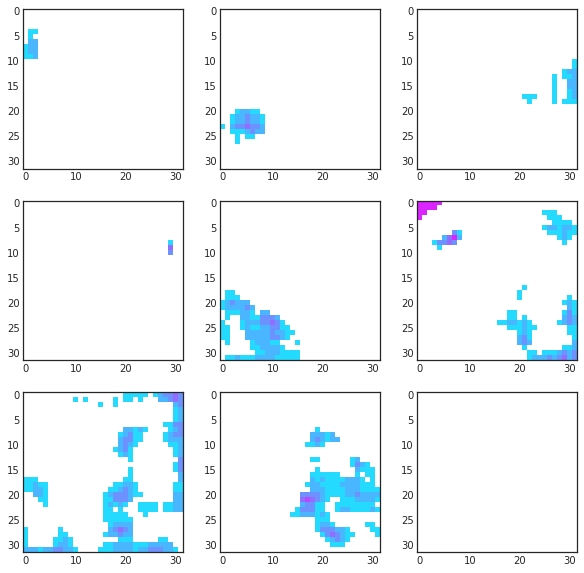

Epoch: 171


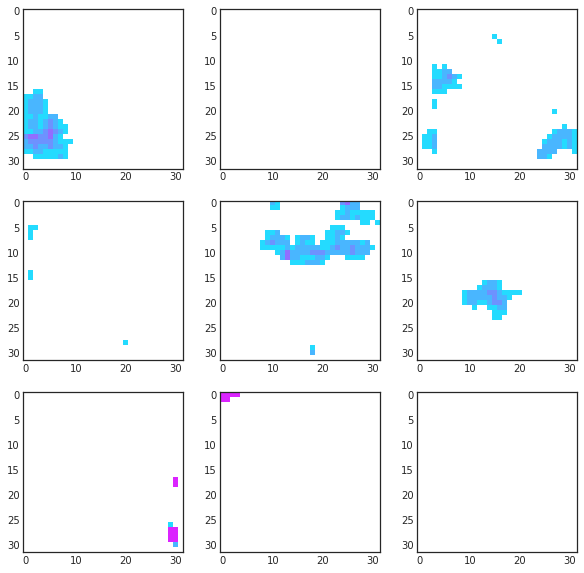

Epoch: 181


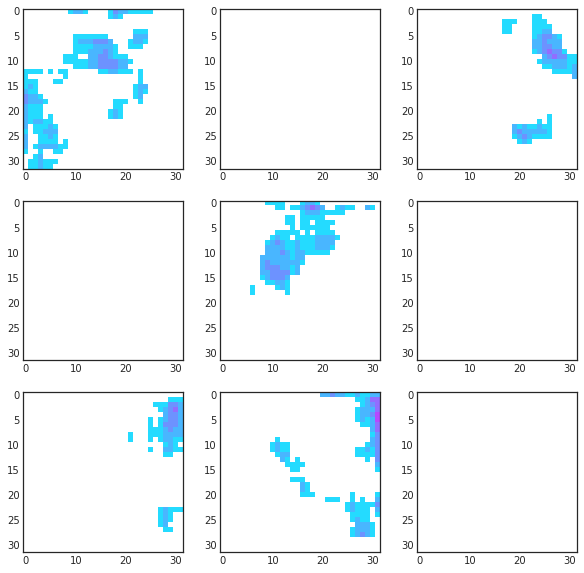

Epoch: 191


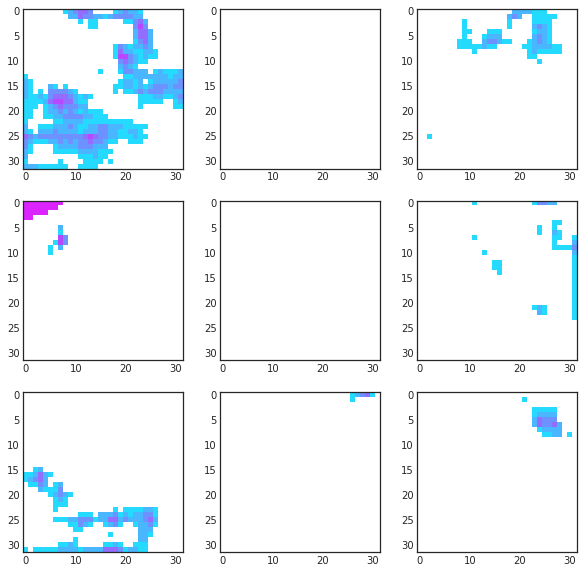

Epoch: 201


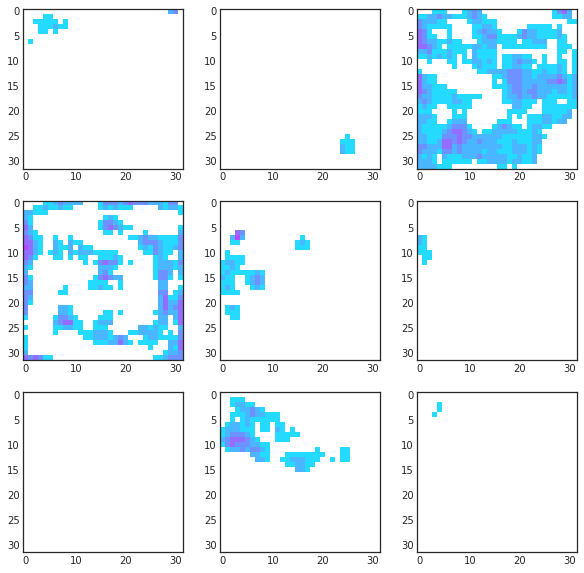

Epoch: 211


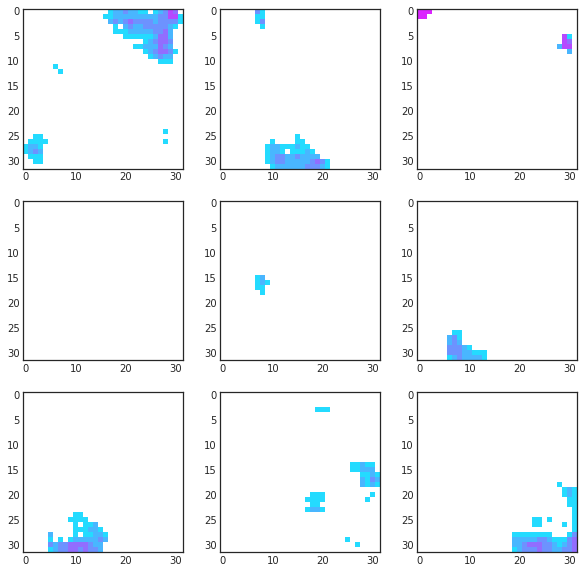

Epoch: 221


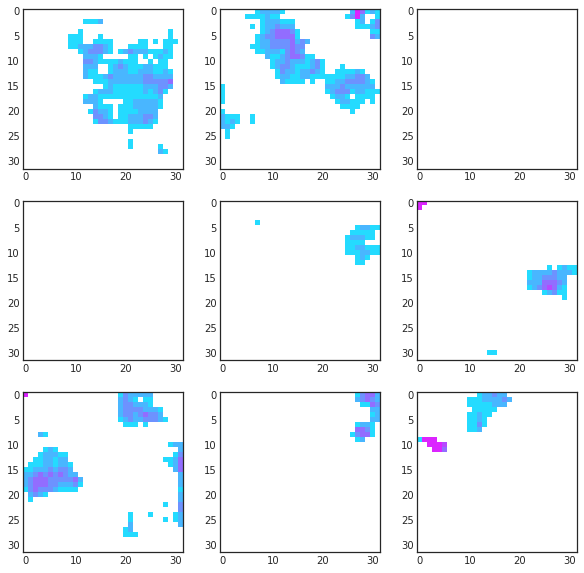

Epoch: 231


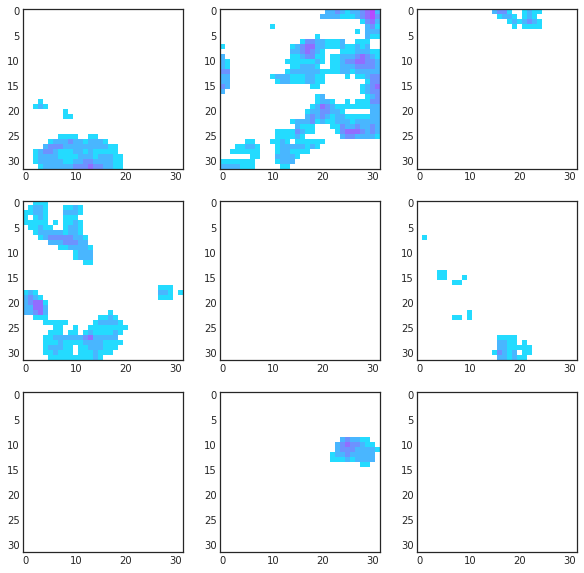

Epoch: 241


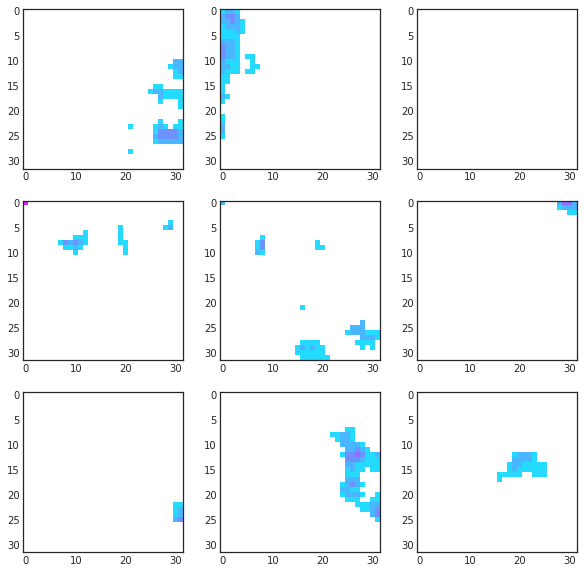

Epoch: 251


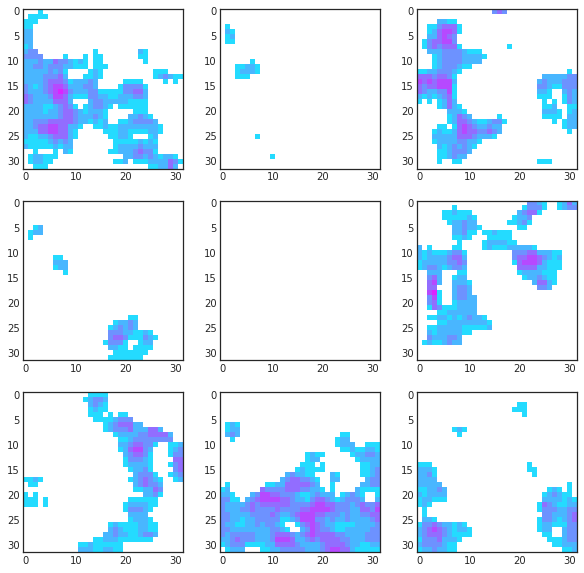

Epoch: 261


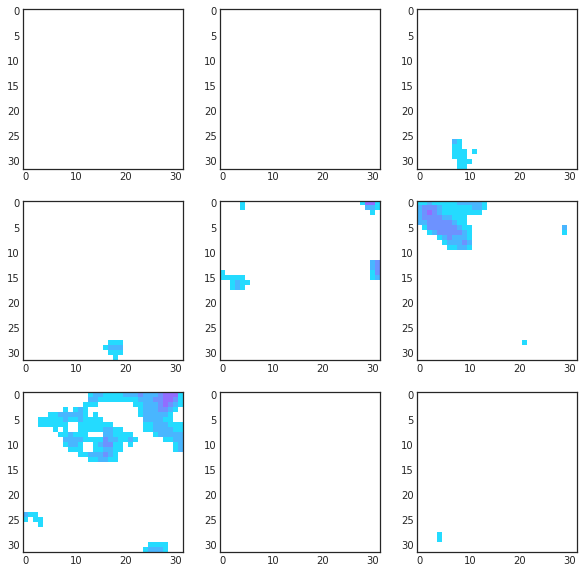

Epoch: 271


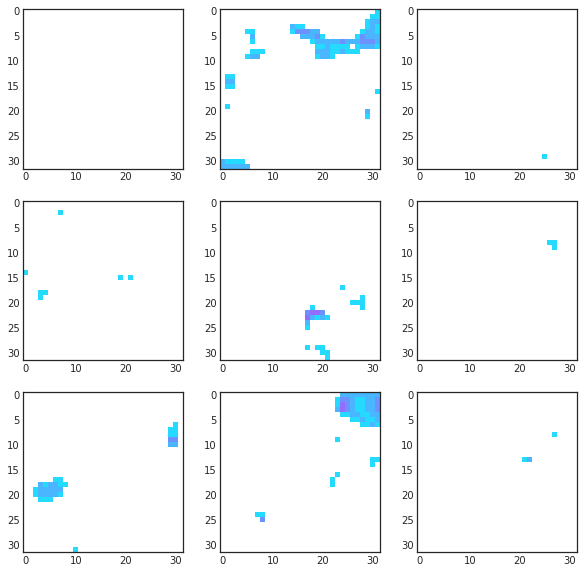

Epoch: 281


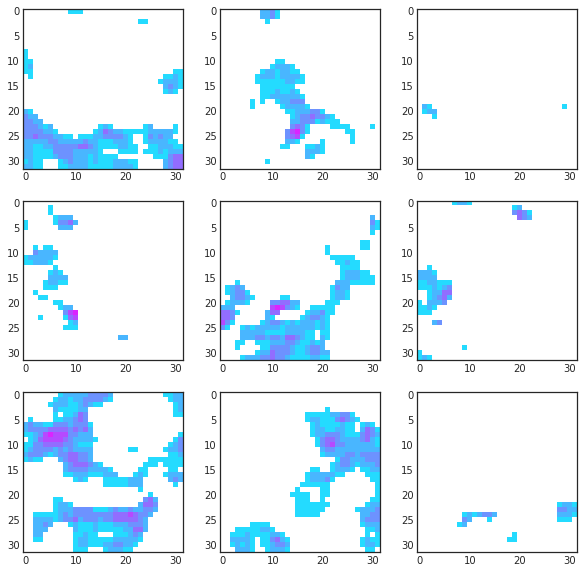

Epoch: 291


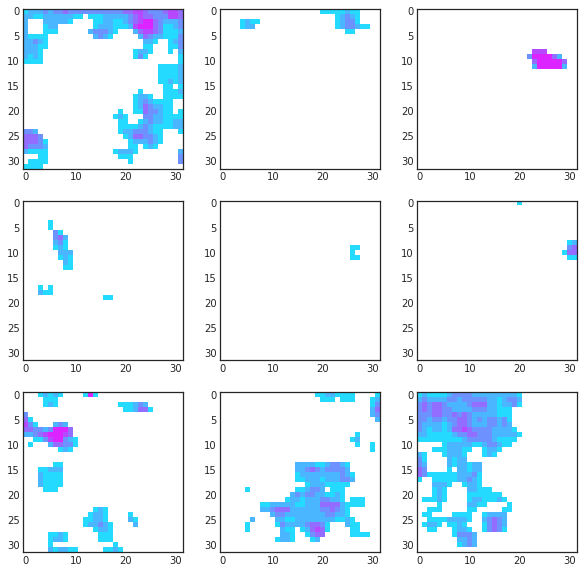

In [46]:
plot_results('radar2')

## RADAR 3 - Complex

History file does not exist (yet)
Epoch: 1


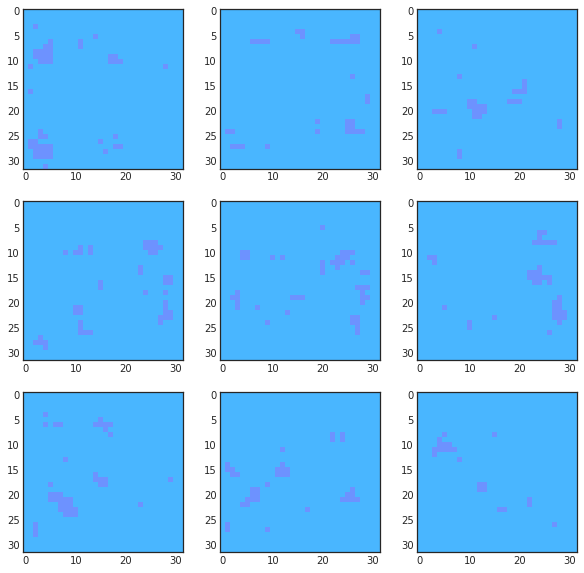

Epoch: 11


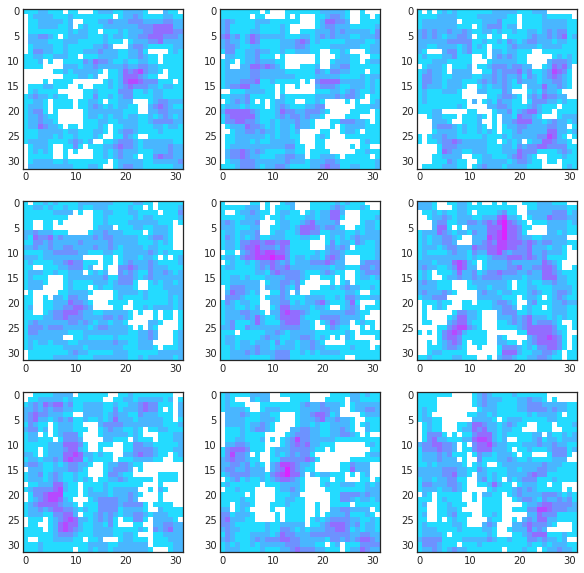

Epoch: 21


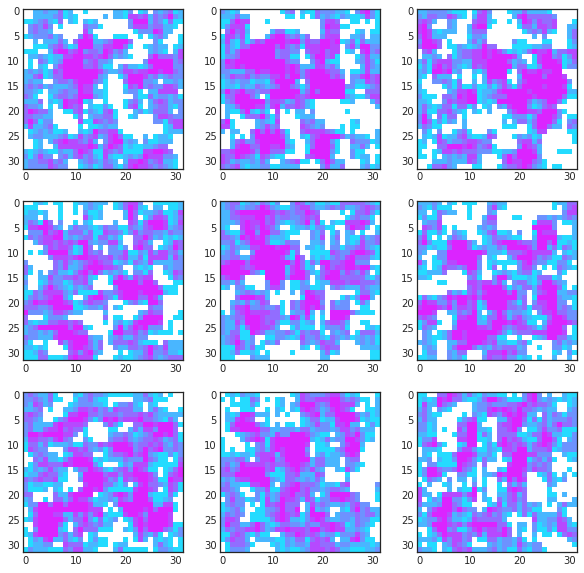

Epoch: 31


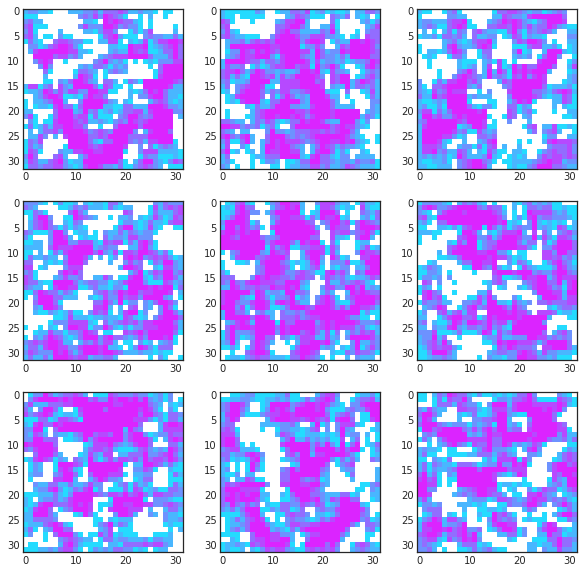

Epoch: 41


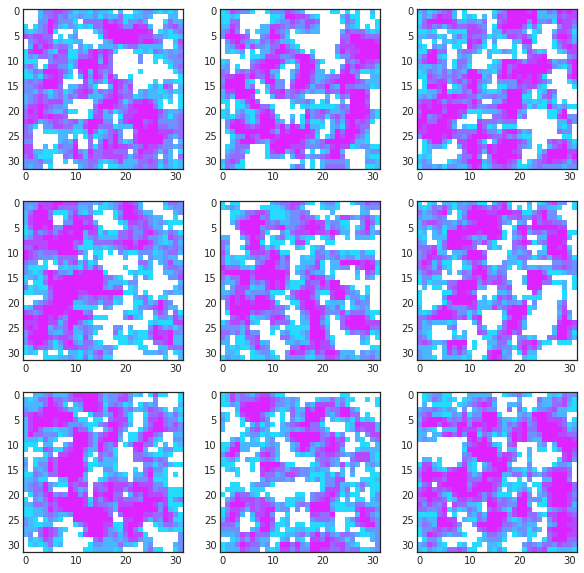

Epoch: 51


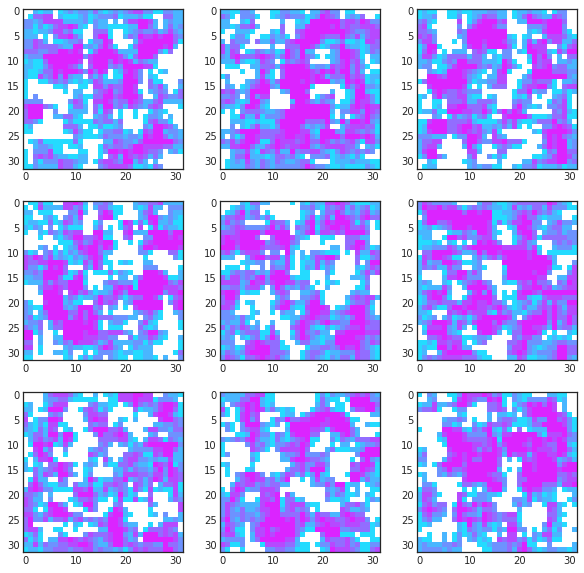

Epoch: 61


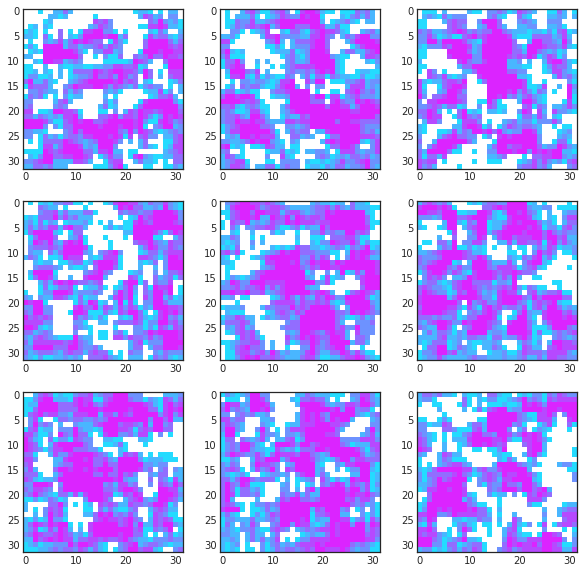

Epoch: 71


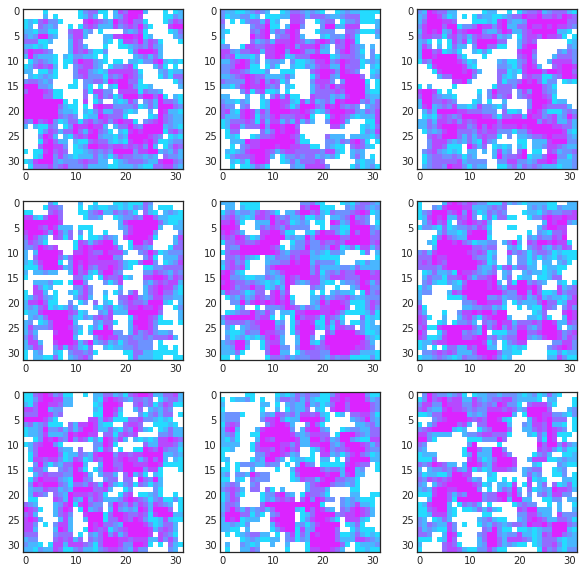

Epoch: 81


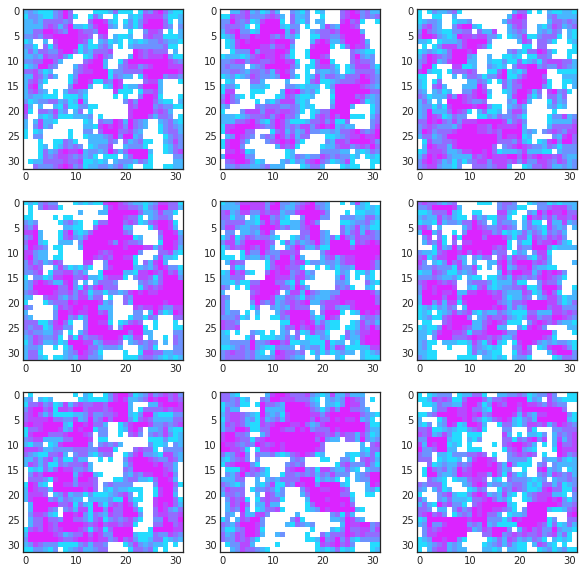

Epoch: 91


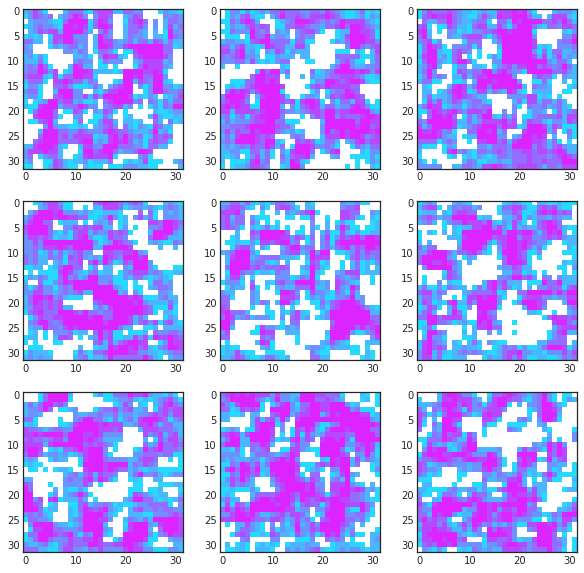

Epoch: 101


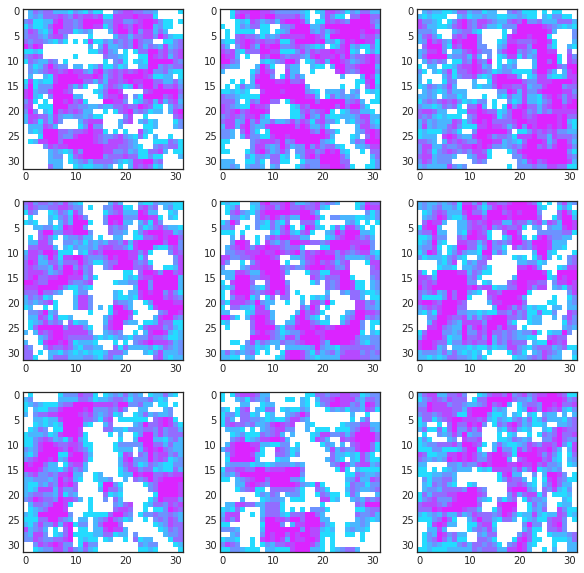

In [47]:
plot_results('radar3')

## RADAR 4 - Complex Wasserstein

History file does not exist (yet)
Epoch: 1


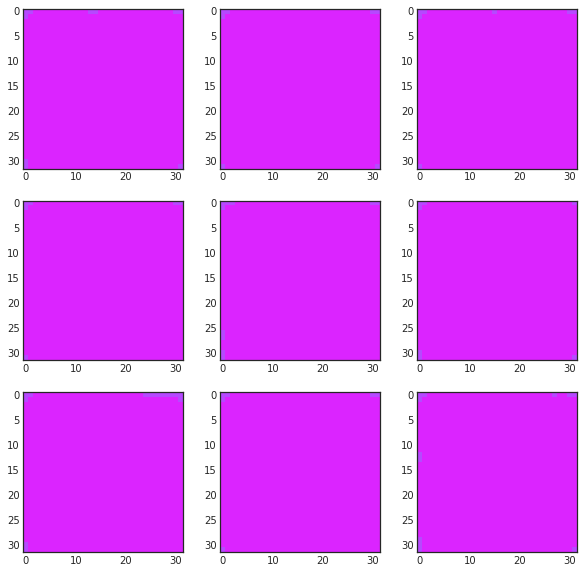

Epoch: 11


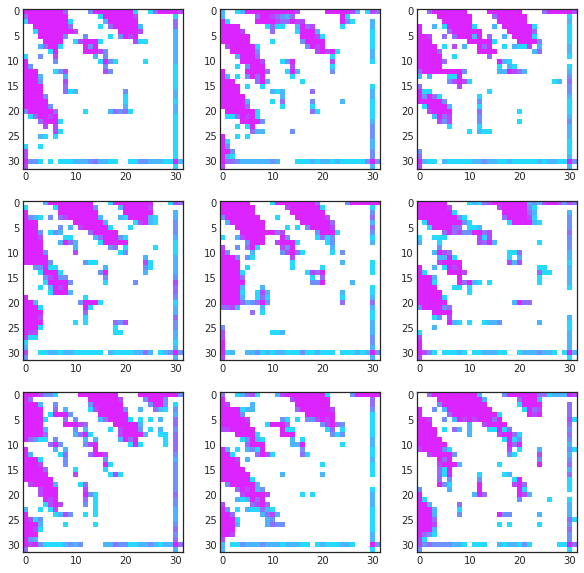

In [48]:
plot_results('radar4')

## RADAR 5 - 64x64 regular

History file does not exist (yet)
Epoch: 1


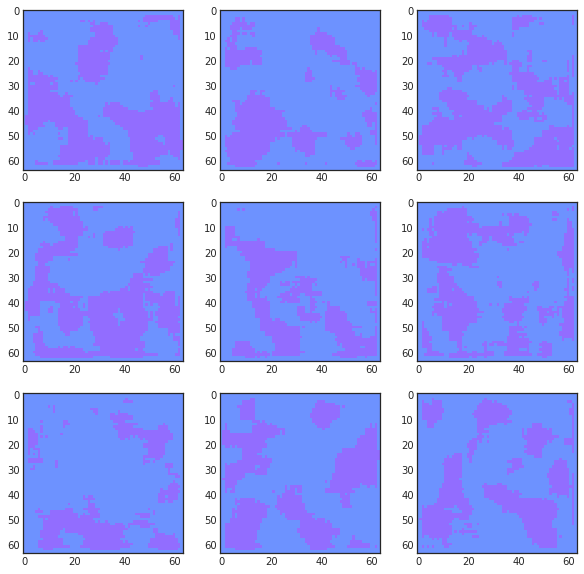

Epoch: 11


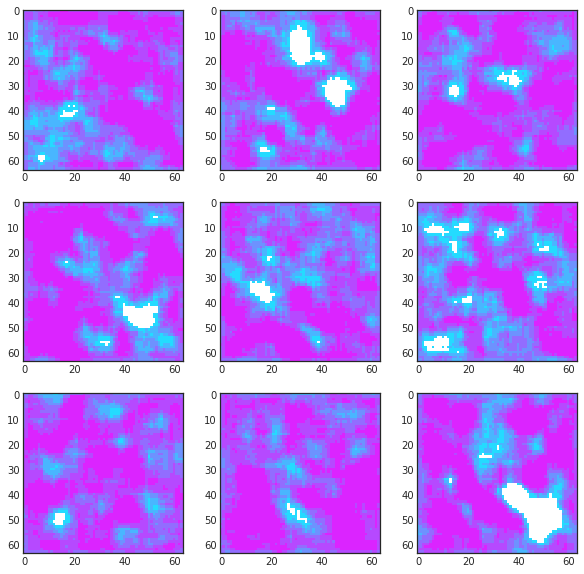

Epoch: 21


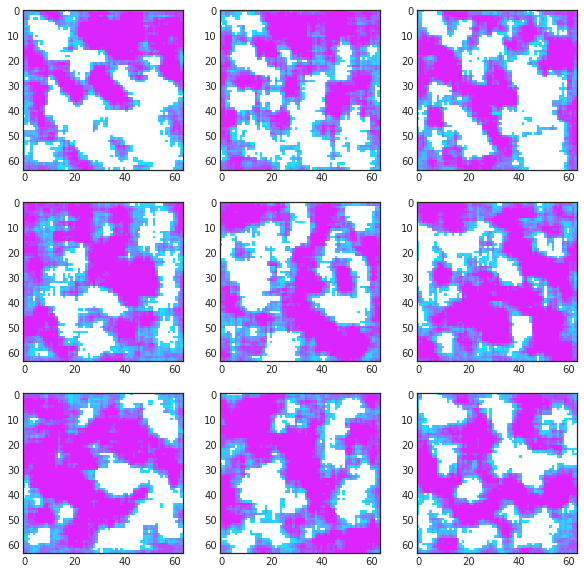

In [49]:
plot_results('radar5')

## RADAR 6 - 64x64 Wasserstein

History file does not exist (yet)
Epoch: 1


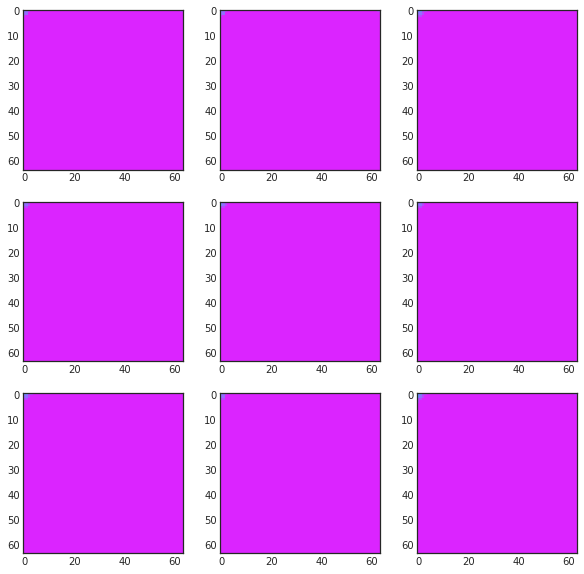

In [50]:
plot_results('radar6')